# COGNITARE - Data Analytics Competition: Round 2

# ML-based Oil Production Estimation on Volve Field Production Data

### Introduction:

This model is created using a dataset from **Volve Field, Equinor**. This dataset and the field history is used to frame and solve a problem statement which is to estimate the oil production from the operational parameters such as bottomhole pressure, tubing differential pressure, wellhead pressure etc. using Data-driven Workflow. The project incorporates two Data Files. The First File contains input data which has been used to create the desired model. The second data file is the test Data file which will be input of the created model.

The **Volve oil field**, located 200 kilometres west of Stavanger at the southern end of the Norwegian sector, was decommissioned in September 2016 after 8.5 years in operation, more than twice as long as originally planned. The development was based on production from the Mærsk Inspirer jack-up rig, with Navion Saga used as a storage ship to hold crude oil before export. Gas was piped to the Sleipner A platform for final processing and export. Volve reached a recovery rate of 54% and in March 2016 the licence decided to shut down its production permanently. The field was originally scheduled for 3-5 years of operation. At plateau Volve produced some 56,000 barrels per day and delivered a total of 63 million barrels. The Volve dataset is the most complete open-source Exploration and Production data available. Equinor disclosed all field data for benefit of students to research and use data for new perspectives.

<img src="Volve Oilfield.jpg">
<h4><center>The Volve field in the Norwegian North Sea: 2008—2016</center></h4>

### Workflow:

<img src="ML model workflow.jpeg">
<h4><center>Model Workflow</center></h4>

# ML Model Creation:

### Importing Python Libraries:
**Python modules** can get access to code from another module by importing the file/function using import. The import statement is the most common way of invoking the import machinery, but it is not the only way. When the import is used, it searches for the module initially in the local scope, the value returned by the function is then reflected in the output of the initial code. Various Python modules like Pandas, Numpy, Seaborn, Klib, Matplotlib, Sklearn, Xgboost, Joblib were imported to create our model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import klib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import joblib

### Importing Data:
The Pandas library has been used to import the production data and create DataFrame. The dataset contains average downhole pressure, average downhole temperature, average drill pipe tubing, average annulus pressure, average choke size, average well-head pressure, average well-head temperature, oil volume, gas volume, water volume for the well with Wellbore code: **5599** and Wellbore name: **15/9-F-12**. The production data was recorded on daily basis.

In [2]:
df = pd.read_excel("input_data_quiz.xlsx")

### Exploratory Data Analysis (EDA):
Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

Exploration of the Data set is being carried out, followed by the exploratory data analysis in python. The major steps to be taken into consideration are:
1. Handle Missing value
2. Removing duplicates
3. Outlier Treatment
4. Normalizing and Scaling( Numerical Variables)
5. Encoding Categorical variables( Dummy Variables)
6. Bivariate Analysis

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

1. Head of the dataset
2. The shape of the dataset
3. Info of the dataset
4. Summary of the dataset (Describe)

In [3]:
df.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,BORE_OIL_VOL
0,5599.0,15/9-F-12,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,38889.0,385.0,285.0
1,5599.0,15/9-F-12,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,285246.0,7.0,1870.0
2,5599.0,15/9-F-12,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,509955.0,1.0,3124.0
3,5599.0,15/9-F-12,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,383427.0,1.0,2608.0
4,5599.0,15/9-F-12,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,418474.0,5.0,3052.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NPD_WELL_BORE_CODE        2498 non-null   float64
 1   NPD_WELL_BORE_NAME        2500 non-null   object 
 2   ON_STREAM_HRS             2499 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE     2498 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE  2492 non-null   float64
 5   AVG_DP_TUBING             2493 non-null   float64
 6   AVG_ANNULUS_PRESS         2492 non-null   float64
 7   AVG_CHOKE_SIZE_P          2495 non-null   float64
 8   AVG_WHP_P                 2495 non-null   float64
 9   AVG_WHT_P                 2496 non-null   float64
 10  DP_CHOKE_SIZE             2496 non-null   float64
 11  BORE_GAS_VOL              2495 non-null   float64
 12  BORE_WAT_VOL              2495 non-null   float64
 13  BORE_OIL_VOL              2490 non-null   float64
dtypes: float

#### Note:
The first two columns (**NPD_WELL_BORE_CODE, NPD_WELL_BORE_NAME**) are irrelevant because they have the same data through the Dataset and doesn't contribute to the Total Oil production, thus they are left out.

In [5]:
df["NPD_WELL_BORE_CODE"].value_counts()

5599.0    2498
Name: NPD_WELL_BORE_CODE, dtype: int64

In [6]:
df["NPD_WELL_BORE_NAME"].value_counts()

15/9-F-12    2500
Name: NPD_WELL_BORE_NAME, dtype: int64

In [7]:
df = df.drop(["NPD_WELL_BORE_NAME","NPD_WELL_BORE_CODE"],axis=1)

In [8]:
df.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,BORE_OIL_VOL
0,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,38889.0,385.0,285.0
1,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,285246.0,7.0,1870.0
2,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,509955.0,1.0,3124.0
3,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,383427.0,1.0,2608.0
4,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,418474.0,5.0,3052.0


### Handling Missing values:
There are various missing values in the respective columns as it is evident from the below coding blocks. There are various ways of treating your missing values in the data set and which technique to use when is actually dependent on the type of data that is being dealt with.

In this case, we drop the missing values from those variables as there are very few missing values in respective columns.

In [9]:
df.isnull().sum()/len(df)*100

ON_STREAM_HRS               0.04
AVG_DOWNHOLE_PRESSURE       0.08
AVG_DOWNHOLE_TEMPERATURE    0.32
AVG_DP_TUBING               0.28
AVG_ANNULUS_PRESS           0.32
AVG_CHOKE_SIZE_P            0.20
AVG_WHP_P                   0.20
AVG_WHT_P                   0.16
DP_CHOKE_SIZE               0.16
BORE_GAS_VOL                0.20
BORE_WAT_VOL                0.20
BORE_OIL_VOL                0.40
dtype: float64

GridSpec(6, 6)

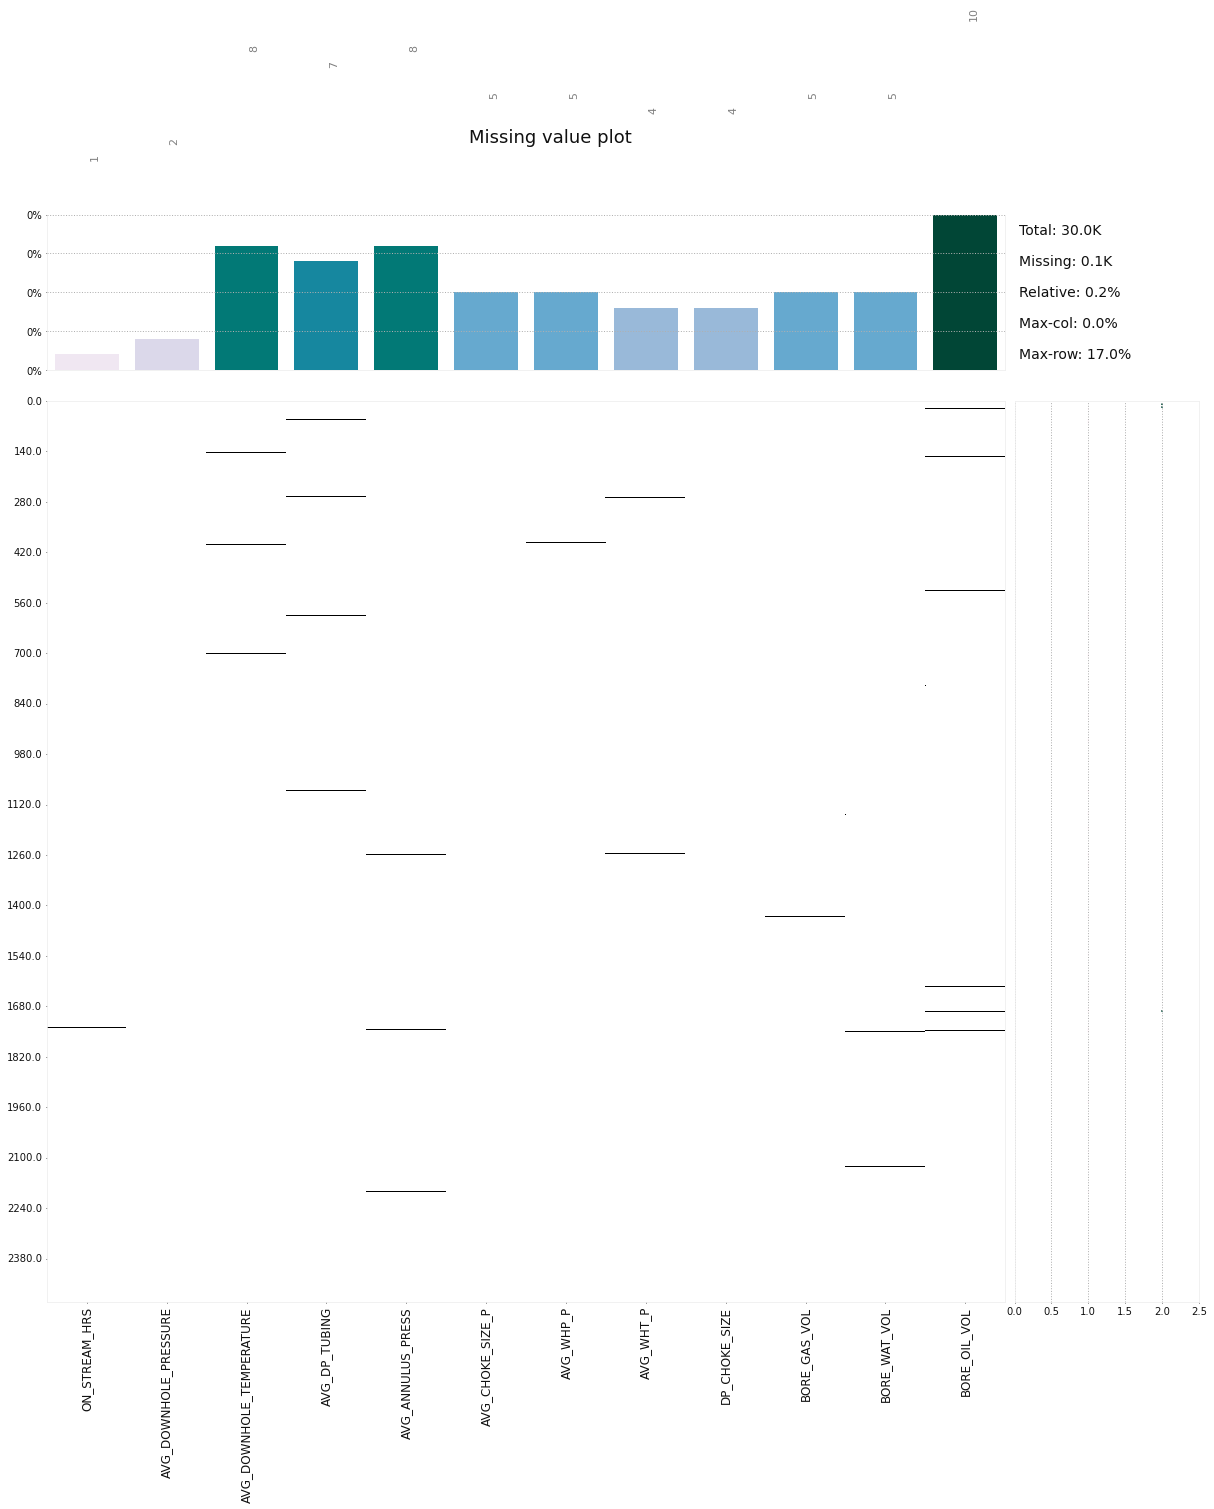

In [10]:
klib.missingval_plot(df)

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()/len(df)*100

ON_STREAM_HRS               0.0
AVG_DOWNHOLE_PRESSURE       0.0
AVG_DOWNHOLE_TEMPERATURE    0.0
AVG_DP_TUBING               0.0
AVG_ANNULUS_PRESS           0.0
AVG_CHOKE_SIZE_P            0.0
AVG_WHP_P                   0.0
AVG_WHT_P                   0.0
DP_CHOKE_SIZE               0.0
BORE_GAS_VOL                0.0
BORE_WAT_VOL                0.0
BORE_OIL_VOL                0.0
dtype: float64

In [13]:
df.shape

(2439, 12)

### Handling Outliers:
Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations. We Generally identify outliers with the help of boxplot, so here box plot shows some of the data points outside the range of the data.

But, removing or replacing the outliers from respective columns will create more complications or decrease the number of records which will hamper the model quality. Thus, we will ignore the outliers for the time being and carry on with our model creation. Later on, if the model quality is degraded after the model creation, we can deal with the Outliers during further iterations.

<AxesSubplot:xlabel='DP_CHOKE_SIZE'>

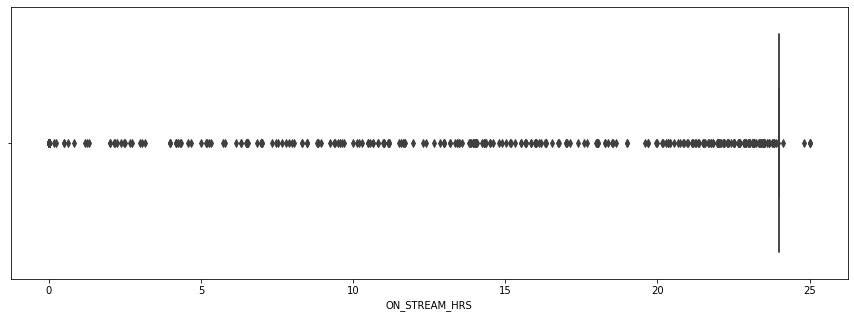

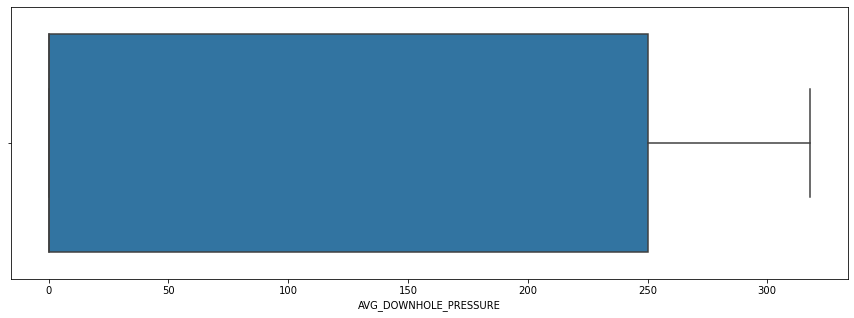

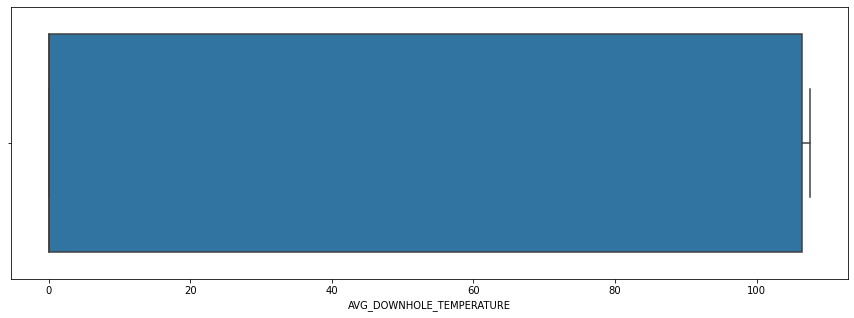

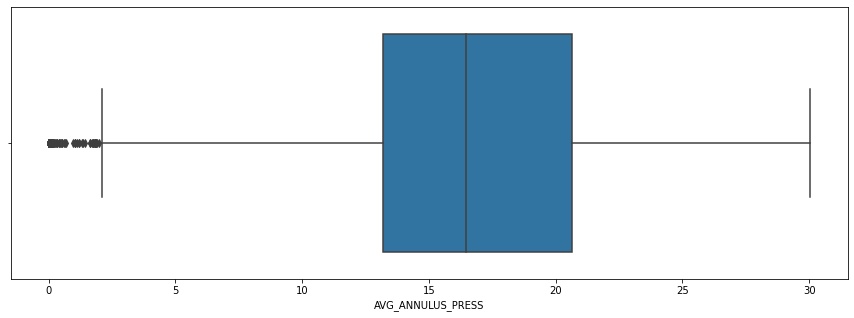

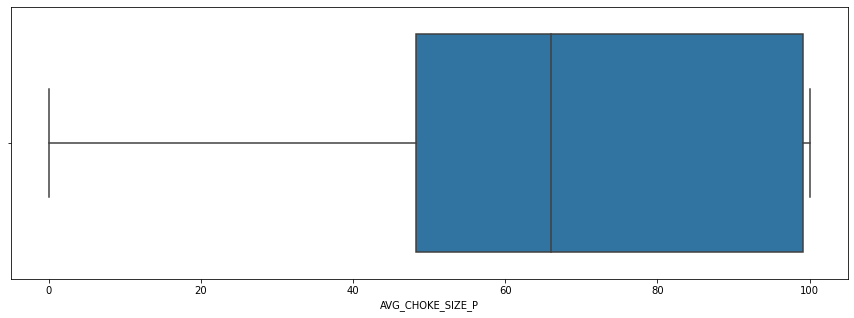

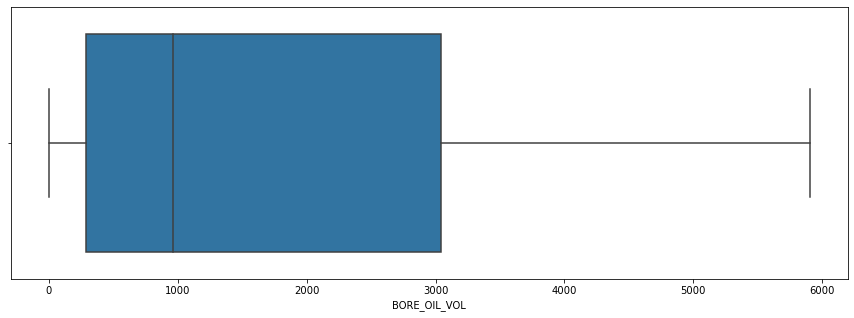

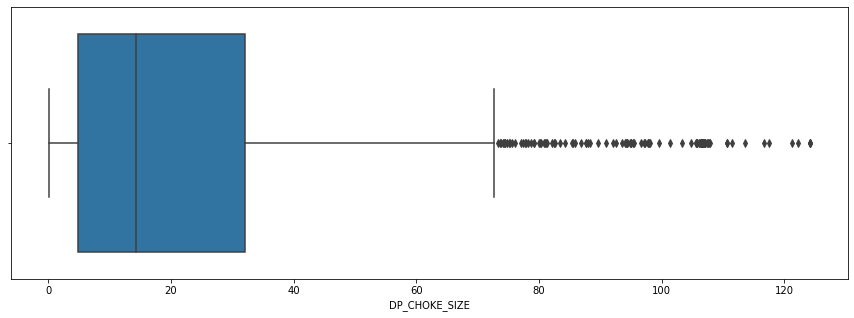

In [14]:
figuresizes = (15,5)
plt.figure(figsize=figuresizes)
sns.boxplot(x='ON_STREAM_HRS', data=df)
plt.figure(figsize=figuresizes)
sns.boxplot(x='AVG_DOWNHOLE_PRESSURE', data=df)
plt.figure(figsize=figuresizes)
sns.boxplot(x='AVG_DOWNHOLE_TEMPERATURE', data=df)
plt.figure(figsize=figuresizes)
sns.boxplot(x='AVG_ANNULUS_PRESS', data=df)
plt.figure(figsize=figuresizes)
sns.boxplot(x='AVG_CHOKE_SIZE_P', data=df)
plt.figure(figsize=figuresizes)
sns.boxplot(x='BORE_OIL_VOL', data=df)
plt.figure(figsize=figuresizes)
sns.boxplot(x='DP_CHOKE_SIZE', data=df)

### Checking Datatypes of Variables:
In the next step, we will check the assigned datatypes for different variables in our Dataset and alter them if necessary. In this case, the datatypes for the variables is correct and acceptable.

In [15]:
df.dtypes

ON_STREAM_HRS               float64
AVG_DOWNHOLE_PRESSURE       float64
AVG_DOWNHOLE_TEMPERATURE    float64
AVG_DP_TUBING               float64
AVG_ANNULUS_PRESS           float64
AVG_CHOKE_SIZE_P            float64
AVG_WHP_P                   float64
AVG_WHT_P                   float64
DP_CHOKE_SIZE               float64
BORE_GAS_VOL                float64
BORE_WAT_VOL                float64
BORE_OIL_VOL                float64
dtype: object

### Log Transformation of the Numerical Variable:
Quite often data arising in real studies are so skewed that standard statistical analyses of these data yield invalid results. Many methods have been developed to test the normality assumption of observed data. When the distribution of the continuous data is non-normal, transformations of data are applied to make the data as "normal" or symmetric bell-shaped distribution as possible and, thus, increase the validity of the associated statistical analyses. The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution. In this case, the log-transformation does remove or reduce skewness.

<AxesSubplot:xlabel='BORE_OIL_VOL', ylabel='Density'>

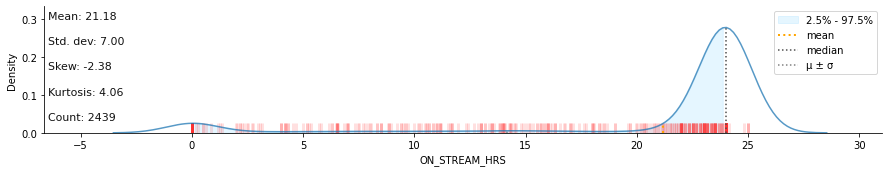

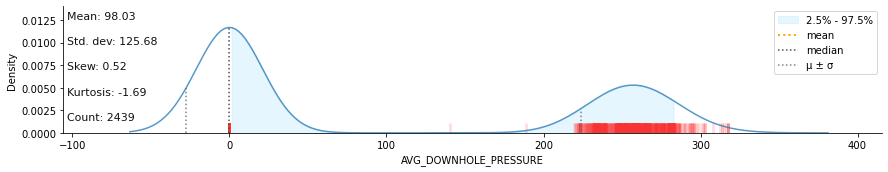

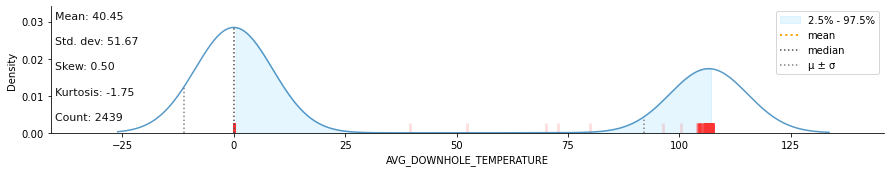

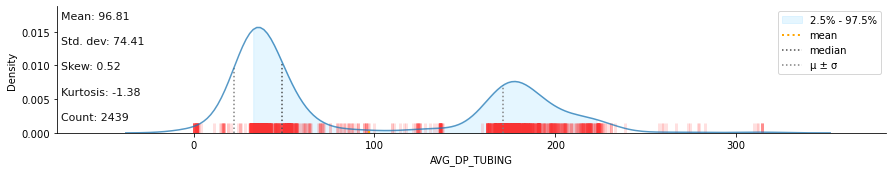

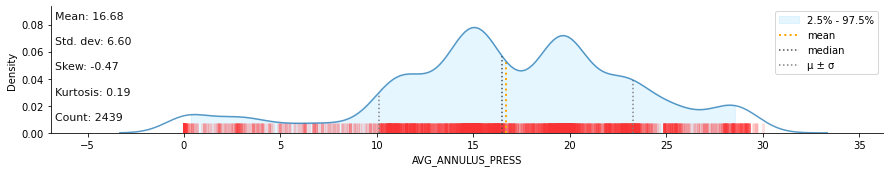

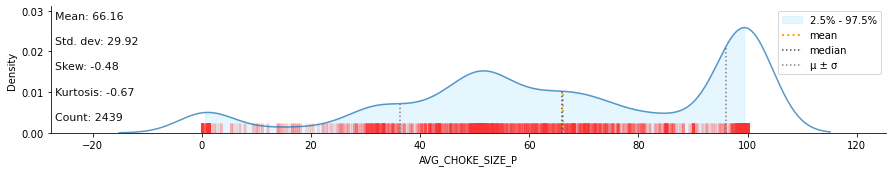

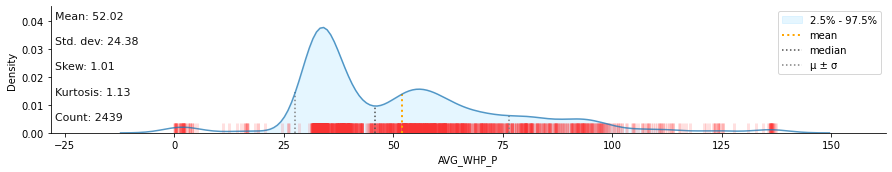

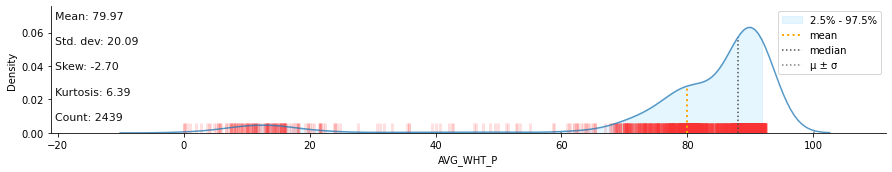

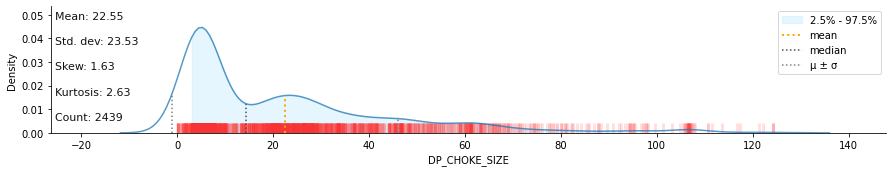

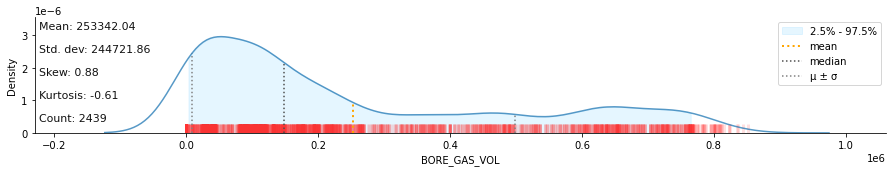

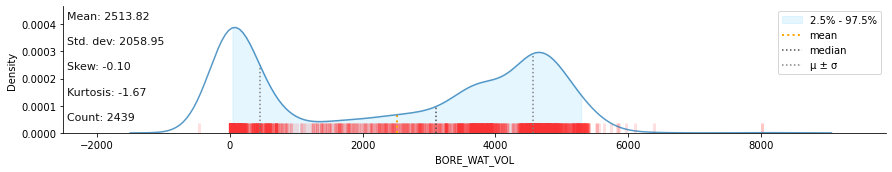

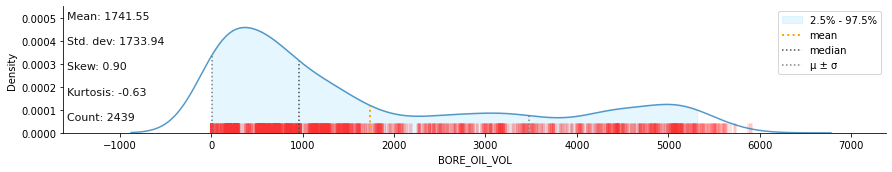

In [16]:
klib.dist_plot(df)

In [17]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,BORE_OIL_VOL
count,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000,2439.000000
mean,21.181919,98.026585,40.451534,96.813549,16.682768,66.158023,52.022410,79.967313,22.552246,253342.038540,2513.823698,1741.548175
std,7.003571,125.684898,51.671642,74.414612,6.595656,29.921753,24.379995,20.091989,23.530519,244721.860618,2058.949915,1733.942701
min,0.000000,0.000000,0.000000,0.058000,0.000000,0.000000,0.000000,0.035000,0.058000,0.000000,-458.000000,0.000000
25%,24.000000,0.000000,0.000000,33.603500,13.177000,48.216745,33.549500,79.338000,4.857500,45124.000000,56.000000,292.000000
50%,24.000000,0.000000,0.000000,48.832000,16.472000,65.988040,45.928000,88.077000,14.340000,147944.000000,3110.000000,961.000000
75%,24.000000,250.286500,106.397500,175.527500,20.643500,99.171290,64.429500,90.552000,32.043500,440792.500000,4557.500000,3046.000000
max,25.000000,317.701000,107.506000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,851132.000000,8020.000000,5902.000000


In [18]:
df[["ON_STREAM_HRS", "AVG_DOWNHOLE_PRESSURE","AVG_DOWNHOLE_TEMPERATURE", "AVG_DP_TUBING", "AVG_WHP_P", "AVG_WHT_P", "DP_CHOKE_SIZE", "BORE_GAS_VOL", "BORE_WAT_VOL"]] = df[["ON_STREAM_HRS", "AVG_DOWNHOLE_PRESSURE","AVG_DOWNHOLE_TEMPERATURE", "AVG_DP_TUBING", "AVG_WHP_P", "AVG_WHT_P", "DP_CHOKE_SIZE", "BORE_GAS_VOL", "BORE_WAT_VOL"]].apply(np.log1p)

In [19]:
df.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,BORE_OIL_VOL
0,2.525729,5.733522,4.657933,5.309505,18.640,14.48443,4.680333,2.850417,4.537694,10.568492,5.955837,285.0
1,3.218876,5.717140,4.667234,5.210278,16.467,22.83299,4.803111,3.995886,4.506675,12.561111,2.079442,1870.0
2,3.157000,5.692337,4.670724,5.208765,12.660,31.24997,4.742477,4.300518,4.395930,13.142080,0.693147,3124.0
3,3.184284,5.699316,4.670508,5.203083,5.264,28.51893,4.769251,4.262624,4.445600,12.856907,0.693147,2608.0
4,3.218876,5.693517,4.671061,5.201261,12.385,30.22790,4.757325,4.283835,4.423157,12.944372,1.791759,3052.0


### Empirical Cumulative Distribution Function:
The Empirical Cumulative Distribution function is used to plot the Oil Production from the well-5599 and see the distribution of Oil Production. From the ECDF plot of Oil Production, it can be seen that in Well-5599 7-8% of total data points has 0 Bore Oil Production, where these are not NA values, these are 0 production points (well is not flowing). Also, it can be seen that there are minimal missing values, which make the possibility that this well is a Producer, which is producing continuosly through its lifetime.

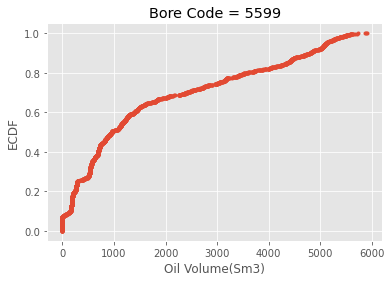

In [20]:
plt.style.use('ggplot')
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y
x_axis, y_axis = ecdf(df['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")


#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5599')

plt.show()

### Feature Selection:
In this step called the Feature Engineering, the various input features are inspected and checked for their importance or their need in contributing to the results. Feature selection is the process of choosing the features that contribute to getting the prediction value right and are correlated to the desired output, either automatically or manually. Employing irrelevant features in the model may decrease the accuracy of the model and make the model learn from irrelevant parameters. Highly correlated parameters, on the other hand, may have the shortcoming defect of not adding a new feature to the process of training the model and this defect is called **Multi-collinearity**. Selecting highly correlated parameters as features may lead to reduction of model accuracy due to the lack of variation in the input data, or sometimes also results in data leakage to the model, and model will perform unbelievably good. The correlation heat-maps were generated in this work to identify the highly correlated parameters.

Text(0.5, 1.0, 'Correlation Heatmap between various Features')

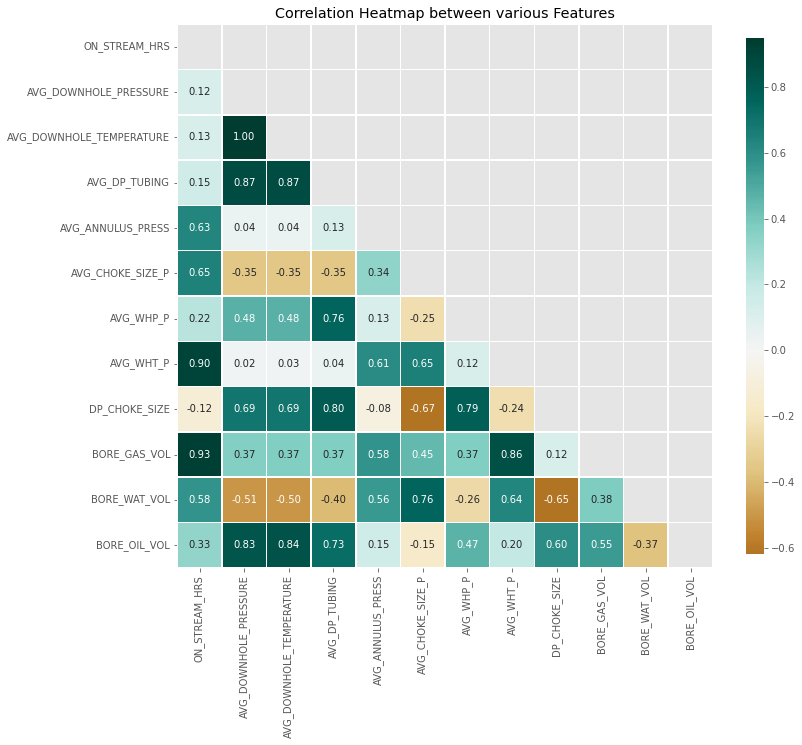

In [21]:
corr = klib.corr_plot(df)
corr.set_title('Correlation Heatmap between various Features')

In [22]:
corr = df.corr()*100
corr.style.background_gradient(cmap='BrBG_r')

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,BORE_OIL_VOL
ON_STREAM_HRS,100.000000,12.456231,12.762533,14.994587,63.332611,64.655230,22.064317,90.293707,-11.557602,92.955523,58.070212,32.807386
AVG_DOWNHOLE_PRESSURE,12.456231,100.000000,99.980448,86.979363,3.720176,-34.981386,47.699399,2.412592,68.912306,36.629353,-50.652432,82.967403
AVG_DOWNHOLE_TEMPERATURE,12.762533,99.980448,100.000000,86.914858,3.848789,-34.573810,47.706882,2.676141,68.802196,36.971292,-50.489648,83.509681
AVG_DP_TUBING,14.994587,86.979363,86.914858,100.000000,12.588486,-34.931718,75.741062,4.212020,80.073901,36.871409,-39.740314,73.043433
AVG_ANNULUS_PRESS,63.332611,3.720176,3.848789,12.588486,100.000000,33.709251,12.578375,60.739010,-7.608392,58.160984,55.797806,14.881855
AVG_CHOKE_SIZE_P,64.655230,-34.981386,-34.573810,-34.931718,33.709251,100.000000,-24.552154,65.224370,-66.907464,45.035285,75.573924,-15.466099
AVG_WHP_P,22.064317,47.699399,47.706882,75.741062,12.578375,-24.552154,100.000000,11.814205,78.528699,36.749548,-25.842087,46.730356
AVG_WHT_P,90.293707,2.412592,2.676141,4.212020,60.739010,65.224370,11.814205,100.000000,-24.280084,85.660703,63.606237,20.045896
DP_CHOKE_SIZE,-11.557602,68.912306,68.802196,80.073901,-7.608392,-66.907464,78.528699,-24.280084,100.000000,11.800947,-64.759970,60.158342
BORE_GAS_VOL,92.955523,36.629353,36.971292,36.871409,58.160984,45.035285,36.749548,85.660703,11.800947,100.000000,38.476781,54.857391


### Note:
It can be seen that **AVG_DOWNHOLE_PRESSURE**, **AVG_DOWNHOLE_TEMPERATURE**, **AVG_DP_TUBING** and **BORE_OIL_VOL**, **BORE_GAS_VOL** are highly correlated with Pearson correlation coefficient of 0.99. It means that including all of these parameters will not add new feature to the model and these parameters have basically linearly correlated data. 

**BORE_GAS_VOLUME** in testing data will lead to data leakage, as it is physically impossible to get Gas Production before getting the Oil Production Volume.

Thus, **ON_STREAM_HRS, AVG_DOWNHOLE_TEMPERATURE, AVG_ANNULUS_PRESS, AVG_CHOKE_SIZE_P, AVG_WHP_P, AVG_WHT_P** are selected as training features.

In [23]:
features = ['ON_STREAM_HRS', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P']
X = df[features].copy()
y = df.BORE_OIL_VOL

### Normalizing and Scaling:
Often the variables of the data set are of different scales i.e. one variable is in millions and others in only 100. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale. MinMaxScaler normalizes the data using the formula (X - Xmean)/(Xmax - Xmin). We will be doing this only for the numerical variables (In this case, all the independent variables are Numerical variables).

In [24]:
mn = MinMaxScaler()
df_new = mn.fit_transform(X)

In [25]:
X = pd.DataFrame(df_new, index=X.index, columns=X.columns)

In [26]:
X.head()

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P
0,0.775216,0.922007,0.620919,0.144844,0.949453,0.625348
1,0.987962,0.904591,0.548534,0.228330,0.974360,0.879720
2,0.968971,0.904325,0.421719,0.312500,0.962060,0.947369
3,0.977345,0.903328,0.175350,0.285189,0.967491,0.938954
4,0.987962,0.903008,0.412558,0.302279,0.965072,0.943664


In [27]:
y.to_frame()

,BORE_OIL_VOL
0,285.0
1,1870.0
2,3124.0
3,2608.0
4,3052.0
...,...
2495,694.0
2496,692.0
2497,707.0
2498,706.0


### ML Model Training and Prediction:
The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term **ML model** refers to the model artifact that is created by the training process. The training data must contain the correct answer, which is known as a **target or target attribute**. The learning algorithm finds patterns in the training data that maps the input data attributes to the target, and it outputs an ML model that captures these patterns. The ML model thus created can be used to get predictions on new data for which the target is unknown. 

The train-test split is a technique for evaluating the performance of a machine learning algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the **training dataset**. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the **test dataset**.

**Gradient boosting** refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems. Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting. Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

**Extreme Gradient Boosting**, or **XGBoost** for short, is an efficient open-source implementation of the gradient boosting algorithm. As such, XGBoost is an algorithm, an open-source project, and a Python library. It is designed to be both computationally efficient (e.g. fast to execute) and highly effective, perhaps more effective than other open-source implementations. The two main reasons to use XGBoost are execution speed and model performance. XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems.

**Hyperparameter tuning** is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning. It can be carried out by different Python modules like GridSearchCV, but they make the model slower. In this case, the hyperparameters were manually tuned as they were pretty much straight-forward, which will make the model run faster.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [29]:
xg = XGBRegressor(n_estimators=2000, learning_rate=0.05, n_jobs=4)
xg.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Checking for Overtifitting problem:
**Overfitting** refers to the scenario where a machine learning model can't generalize or fit well on unseen dataset. A clear sign of machine learning overfitting is if its error on the testing or validation dataset is much greater than the error on training dataset.

In this case, the difference between the R2 score of the model when applied in the Training and Testing Dataset is very minimal or negligible, thus there should be no Overfitting issue incorporated with the model.

In [30]:
pred_xg_test = xg.predict(X_test)
pred_xg_train = xg.predict(X_train)

### ML Model Evaluation:
The skill or performance of a regression model must be reported as an error in those predictions. There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

1. **Mean Squared Error (MSE):** The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.
2. **R2 score:** R-squared (R2), which is the proportion of variation in the outcome that is explained by the predictor variables. In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model.
3. **Mean Absolute Error (MAE):** The MAE score is calculated as the average of the absolute error values.

There are many other metrics for regression, although these are the most commonly used.

In [31]:
print("R2 score of the Testing Dataset is:", r2_score(y_test, pred_xg_test)*100)
print("R2 score of the Training Dataset is:", r2_score(y_train,pred_xg_train)*100)

R2 score of the Testing Dataset is: 98.36197184285119
R2 score of the Training Dataset is: 99.99952652369728


In [32]:
print("MAE of the Testing Dataset is:", mean_absolute_error(y_test, pred_xg_test))

MAE of the Testing Dataset is: 101.09998118331404


In [33]:
print("MSE of the Testing Dataset is:", mean_squared_error(y_test, pred_xg_test))

MSE of the Testing Dataset is: 53236.61729002487


### Comparison between Actual Oil Production and our Models Predicted Oil Production:
When we compare the actual Oil Production with the Model's predicted oil production for the well's test data using scatterplot of Matplotlib library, we see that most of the point overlaps or are so much close to eachother, which validates the Model's performance.

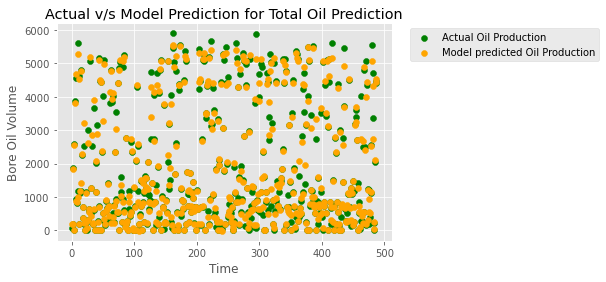

In [34]:
x_=[i for i in range(len(y_test))]
plt.scatter(x_,y_test, label='Actual Oil Production', color = 'green')
plt.scatter(x_,pred_xg_test, label='Model predicted Oil Production', color = 'Orange')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Time")
plt.ylabel("Bore Oil Volume")
plt.title('Actual v/s Model Prediction for Total Oil Prediction')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

### Cross-Validation:
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds". Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold). Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

In [35]:
scores = -1 * cross_val_score(xg, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [ 641.66940898 1498.67852294  274.87849817  178.51558464  444.97231129]


In [36]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
607.7428652019883


### Feature Ranking:
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [37]:
rfe = RFE(xg, n_features_to_select=None)
rfe.fit(X,y)

RFE(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                           colsample_bylevel=1, colsample_bynode=1,
                           colsample_bytree=1, gamma=0, gpu_id=-1,
                           importance_type='gain', interaction_constraints='',
                           learning_rate=0.05, max_delta_step=0, max_depth=6,
                           min_child_weight=1, missing=nan,
                           monotone_constraints='()', n_estimators=2000,
                           n_jobs=4, num_parallel_tree=1, random_state=0,
                           reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                           subsample=1, tree_method='exact',
                           validate_parameters=1, verbosity=None))

In [38]:
list(zip(X.columns, rfe.ranking_ ))

[('ON_STREAM_HRS', 1),
 ('AVG_DP_TUBING', 1),
 ('AVG_ANNULUS_PRESS', 2),
 ('AVG_CHOKE_SIZE_P', 1),
 ('AVG_WHP_P', 4),
 ('AVG_WHT_P', 3)]

### Saving the Model:
Pickle is the standard way of serializing objects in Python. We can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions.

In [39]:
joblib.dump(xg, "model.pkl")

['model.pkl']

### Results:
Thus, the model created using Extreme Gradient Boosting algorithm achieves excellent results and gives out a R2 score of **99% (~98.99%)**, which represents a great model. Now, this model can be used to get predictions on new data for which the target variable (in this case, Total Oil Production) is unknown, given that the independent variables (in this case, Production data) is readily available.

# Predictions on Validation Dataset:

### Importing, EDA and Pre-processing on Validation Data:
We should do the same preprocessing steps on our Validation Dataset as we did in the Training and Testing dataset to make new predictions, however if that preprocessing depends on the data (e.g. Standardization, PCA) then we should calculate it on our training data and then use the parameters from that calculation to apply it to our validation and test data.

In [40]:
df_test = pd.read_excel("test_data_quiz.xlsx")

In [41]:
df_test.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0


In [42]:
df_test = df_test.drop(["NPD_WELL_BORE_NAME","NPD_WELL_BORE_CODE"],axis=1)

In [43]:
df_test.isnull().sum()/len(df)*100

ON_STREAM_HRS               0.000000
AVG_DOWNHOLE_PRESSURE       0.000000
AVG_DOWNHOLE_TEMPERATURE    0.000000
AVG_DP_TUBING               0.287003
AVG_ANNULUS_PRESS           0.246002
AVG_CHOKE_SIZE_P            0.205002
AVG_WHP_P                   0.123001
AVG_WHT_P                   0.246002
DP_CHOKE_SIZE               0.205002
BORE_GAS_VOL                0.246002
BORE_WAT_VOL                0.287003
dtype: float64

In [44]:
df_test = df_test.dropna()

In [45]:
df_test.isnull().sum()/len(df)*100

ON_STREAM_HRS               0.0
AVG_DOWNHOLE_PRESSURE       0.0
AVG_DOWNHOLE_TEMPERATURE    0.0
AVG_DP_TUBING               0.0
AVG_ANNULUS_PRESS           0.0
AVG_CHOKE_SIZE_P            0.0
AVG_WHP_P                   0.0
AVG_WHT_P                   0.0
DP_CHOKE_SIZE               0.0
BORE_GAS_VOL                0.0
BORE_WAT_VOL                0.0
dtype: float64

In [46]:
df.shape

(2439, 12)

In [47]:
df_test.dtypes

ON_STREAM_HRS               float64
AVG_DOWNHOLE_PRESSURE         int64
AVG_DOWNHOLE_TEMPERATURE      int64
AVG_DP_TUBING               float64
AVG_ANNULUS_PRESS           float64
AVG_CHOKE_SIZE_P            float64
AVG_WHP_P                   float64
AVG_WHT_P                   float64
DP_CHOKE_SIZE               float64
BORE_GAS_VOL                float64
BORE_WAT_VOL                float64
dtype: object

In [48]:
df_test.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
count,455.000000,455.0,455.0,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,23.518857,0.0,0.0,30.906305,20.043695,86.402611,30.906305,77.946042,3.952163,57719.015385,1114.487912
std,2.812953,0.0,0.0,8.741760,4.305509,26.594776,8.741760,6.966520,7.706420,25439.286772,235.000767
min,0.000000,0.0,0.0,1.265000,0.000000,0.127140,1.265000,10.875000,0.255000,0.000000,0.000000
25%,24.000000,0.0,0.0,26.517000,18.865500,99.995955,26.517000,77.751500,0.548500,35206.000000,1130.000000
50%,24.000000,0.0,0.0,27.493000,20.234000,100.000000,27.493000,79.705000,0.738000,55608.000000,1184.000000
75%,24.000000,0.0,0.0,29.606500,21.205500,100.000000,29.606500,80.574500,0.997000,79078.000000,1241.000000
max,24.000000,0.0,0.0,110.390000,28.870000,100.000000,110.390000,82.490000,81.751000,108156.000000,1566.000000


In [49]:
df[["ON_STREAM_HRS", "AVG_DOWNHOLE_PRESSURE","AVG_DOWNHOLE_TEMPERATURE", "AVG_DP_TUBING", "AVG_WHP_P", "AVG_WHT_P", "DP_CHOKE_SIZE", "BORE_GAS_VOL", "BORE_WAT_VOL"]] = df[["ON_STREAM_HRS", "AVG_DOWNHOLE_PRESSURE","AVG_DOWNHOLE_TEMPERATURE", "AVG_DP_TUBING", "AVG_WHP_P", "AVG_WHT_P", "DP_CHOKE_SIZE", "BORE_GAS_VOL", "BORE_WAT_VOL"]].apply(np.log1p)

In [50]:
features_test = ['ON_STREAM_HRS', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P']
X_test = df_test[features_test].copy()

In [51]:
df_test_new = mn.fit_transform(X_test)

In [52]:
X_test = pd.DataFrame(df_test_new, index=X_test.index, columns=X_test.columns)

In [53]:
X_test.head()

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P
0,1.0,0.466273,0.994596,0.351511,0.466273,0.860644
1,1.0,0.462140,1.000000,0.353855,0.462140,0.873993
2,1.0,0.460417,0.994215,0.354920,0.460417,0.863018
3,1.0,0.457448,0.987530,0.355746,0.457448,0.851372
4,1.0,0.451446,0.981573,0.356314,0.451446,0.851246


### Loading the ML Model and Prediction:
The ML Model was saved in a pickle file which is now loaded to deserialize the created model and it is used to make new predictions.

In [54]:
model = joblib.load("model.pkl")

In [55]:
pred_test_xg = model.predict(X_test)

In [56]:
df_test["Predicted Oil Production"] = pred_test_xg

In [57]:
df_test.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,Predicted Oil Production
0,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0,600.678833
1,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0,598.706421
2,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0,600.678833
3,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0,578.205444
4,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0,591.622314


In [58]:
df_test.insert(0, "NPD_WELL_BORE_CODE", 5599, True)

In [59]:
df_test.insert(1, "NPD_WELL_BORE_NAME", "15/9-F-12", True)

In [60]:
df_test.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,Predicted Oil Production
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0,600.678833
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0,598.706421
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0,600.678833
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0,578.205444
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0,591.622314


### Exporting the Output Model:
The to_excel() method is used to export the DataFrame to the excel file.

In [61]:
df_test.to_excel("Test_data_quiz_results-Check-.xlsx", index= None)

### Conclusions:
Prediction of Bore Oil Volume using Production Parameters is one of the most important work for a production engineer. The conventional way to do this is using empirical correlations which have a lot of assumptions and also these empirical correlations are derived from some specific field, so it is possible that these are not valid for some other fields. So, if we have sufficient production data from a field we can derive Data-based Correlations for that field by using Machine Learning algorithms. These correlations will be helpful for predicting Bore oil volume for some new wells at various production parameters in that field, and also these don't have any assumptions, just pure Data and Statistics.

### Submitted By:
**Gairik Chakraborty; SPT'17**

**Credits:** Special Thanks to Divyanshu and Jaiyesh sir for inspiring us and highlighting the importance and applications of Data-driven approaches in the Oil & Gas industry :) 